# Data Preparation and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [2]:
start = '1984-09-07'
end = '2024-09-07'
stock = 'BK'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1984-09-07,2.616865,2.638948,2.583740,2.583740,0.900329,341888
1,1984-09-10,2.583740,2.605823,2.572698,2.605823,0.908024,69057
2,1984-09-11,2.605823,2.616865,2.594781,2.594781,0.904177,246793
3,1984-09-12,2.583740,2.583740,2.561656,2.583740,0.900329,131321
4,1984-09-13,2.583740,2.649989,2.528532,2.649989,0.923414,1155854
...,...,...,...,...,...,...,...
10075,2024-08-30,67.339996,68.370003,67.120003,68.220001,68.220001,4352000
10076,2024-09-03,67.849998,68.309998,67.570000,67.889999,67.889999,3259200
10077,2024-09-04,68.239998,68.540001,67.580002,67.739998,67.739998,2942700
10078,2024-09-05,68.260002,68.489998,67.400002,68.000000,68.000000,3850100


In [5]:
ma_100_days = data.Close.rolling(100).mean()

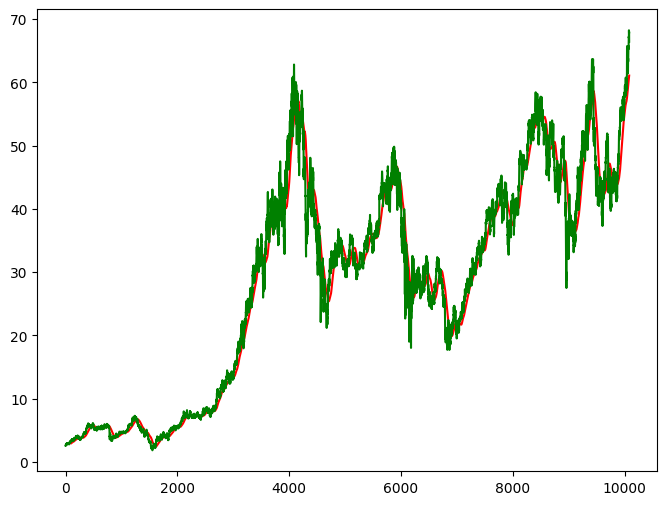

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

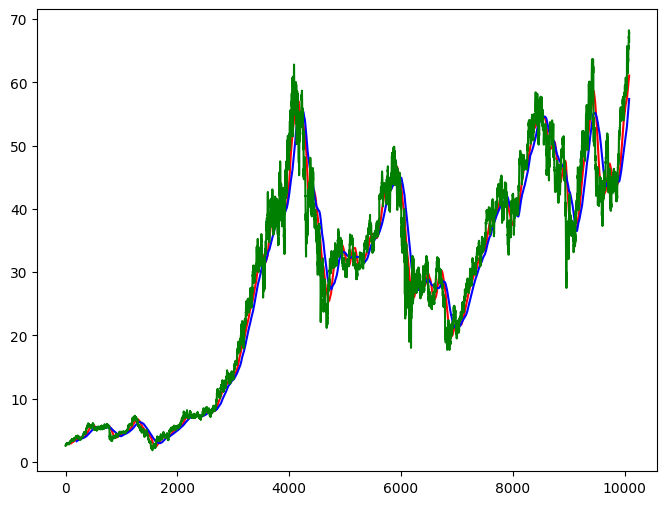

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])

In [11]:
data_train.shape[0]

8064

In [12]:
data_test.shape[0]

2016

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
X = []
y = []

for i in range(100, data_train_scale.shape[0]):
    X.append(data_train_scale[i-100: i])
    y.append(data_train_scale[i, 0])

In [16]:
X, y = np.array(X), np.array(y)

# Model Creation

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 97s 350ms/step - loss: 0.0350
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 136s 327ms/step - loss: 0.0057
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 80s 320ms/step - loss: 0.0043
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 82s 319ms/step - loss: 0.0036
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 83s 321ms/step - loss: 0.0031
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 82s 320ms/step - loss: 0.0030
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 75s 302ms/step - loss: 0.0025
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 89s 330ms/step - loss: 0.0024
Epoch 9/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 143s 332ms/step - loss: 0.0022
Epoch 10/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 81s 324ms/step - loss: 0.0023
Epoch 11/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 82s 325ms/step - loss: 0.0021
Epoch 12/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 79s 316ms/step - loss: 0.0021
Epoch 13/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 81s 324ms/step - loss: 0.0018
Epoch 14/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 79s 317ms/step - loss: 0.0019
Epoch 15/50
2

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

# Predicting Values from Model

In [29]:
pas_100_days = data_train.tail(100)

In [30]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [33]:
data_test

,Close
0,36.130001
1,37.779999
2,38.060001
3,37.849998
4,38.310001
...,...
2111,68.220001
2112,67.889999
2113,67.739998
2114,68.000000


In [32]:
data_test_scale = scaler.fit_transform(data_test)

In [36]:
X = []
y = []

for i in range(100, data_test_scale.shape[0]):
    X.append(data_test_scale[i-100: i])
    y.append(data_test_scale[i, 0])

In [37]:
X, y = np.array(X), np.array(y)

In [38]:
y_predict = model.predict(X)

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step


In [39]:
y_predict

array([[0.38559306],
       [0.38784873],
       [0.38913617],
       ...,
       [0.8894859 ],
       [0.88810056],
       [0.8871091 ]], dtype=float32)

In [40]:
scale = 1 / scaler.scale_

In [41]:
y_predict = y_predict * scale

In [42]:
y = y * scale

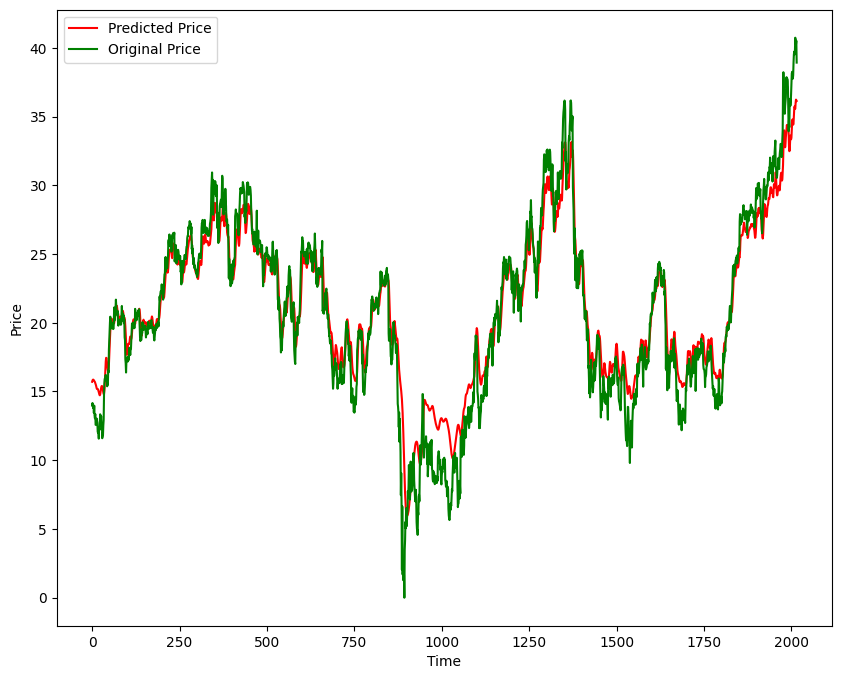

In [44]:
plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [45]:
model.save('model.keras')